In [16]:
#Importing basic libraries
 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sn

In [6]:
#Importing data in a dataframe

data = pd.read_csv("weatherAUS.csv")

In [7]:
#Checking data shape

data.shape

(142193, 24)

In [8]:
#Checking datatypes and data count

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [9]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [10]:
# Converting RainToday and RainTomorrow - categorical variable into numerical ones

data['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
data['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

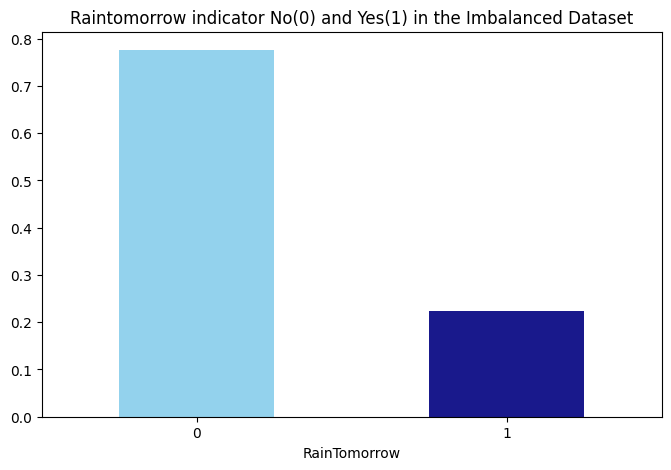

In [14]:
# Checking data imbalance

fig = plt.figure(figsize=(8,5))

data['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','navy'], alpha=0.9, rot=0)
plt.title('Raintomorrow indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

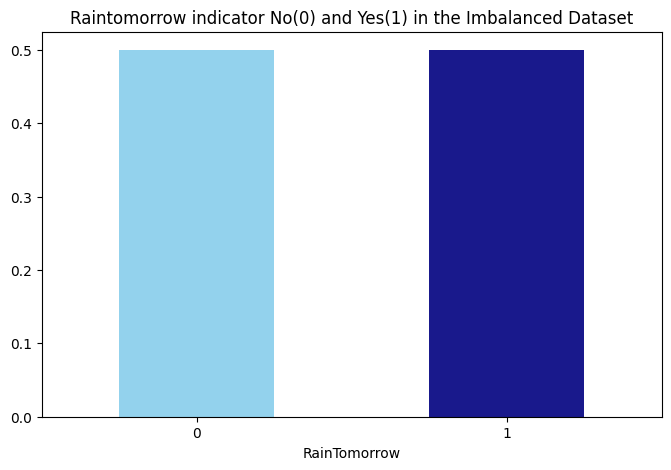

In [17]:
# Clearly, there is imbalance in the data,
# Balancing the dataset by upsampling the RainTomorrow = 1 entries using sklearn's resample module

no = data[data['RainTomorrow']==0]
yes = data[data['RainTomorrow']==1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize=(8,5))

oversampled['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','navy'], alpha=0.9, rot=0)
plt.title('Raintomorrow indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

<Axes: >

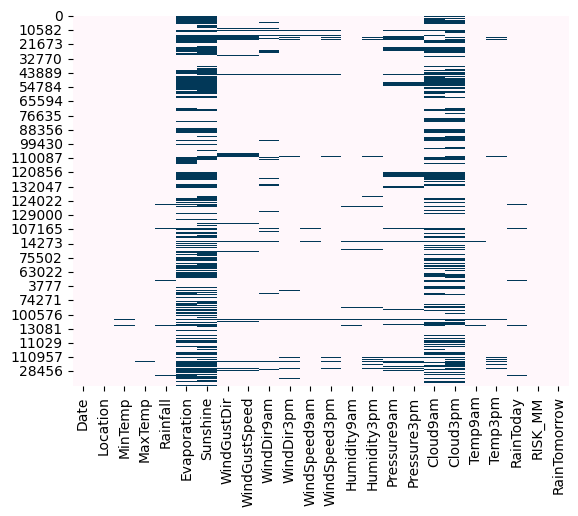

In [18]:
# Missing data pattern in training data
sn.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [22]:
# Checking null entries in the dataset
# Clearly, Evaporation, Sunshine, Cloud9am and Cloud3pm are the features with max null entries

total = oversampled.isnull().sum().sort_values(ascending=False)
percent = 100*(oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing.head(10)

# Getting the count and percent of null values in the dataset

,Total,Percentage
Sunshine,104831,47.513960
Evaporation,95411,43.244407
Cloud3pm,85614,38.803981
Cloud9am,81339,36.866366
Pressure3pm,21746,9.856231
Pressure9am,21728,9.848073
WindGustDir,15491,7.021194
WindGustSpeed,15354,6.959099
WindDir9am,14728,6.675369
WindDir3pm,6440,2.918888


In [ ]:
# The null percentage is less than 50% for 4 features
# We won't drop the features, but try to impute using suitable statistical approach

In [23]:
# Getting the columns with 'Object' datatype
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [24]:
# Imputing the null entries with mode of rest of the values

oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [25]:
# Label Encoding
# Convert categorical variable into continous features using label encoder
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [28]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:,:] = mice_imputer.fit_transform(oversampled)

In [29]:
# Detecting Outliers using IQR approach
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [30]:
# Removing outliers from the dataset

MiceImputed = MiceImputed[~((MiceImputed < (Q1-1.5*IQR)) | (MiceImputed > (Q3+1.5*IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

<Axes: >

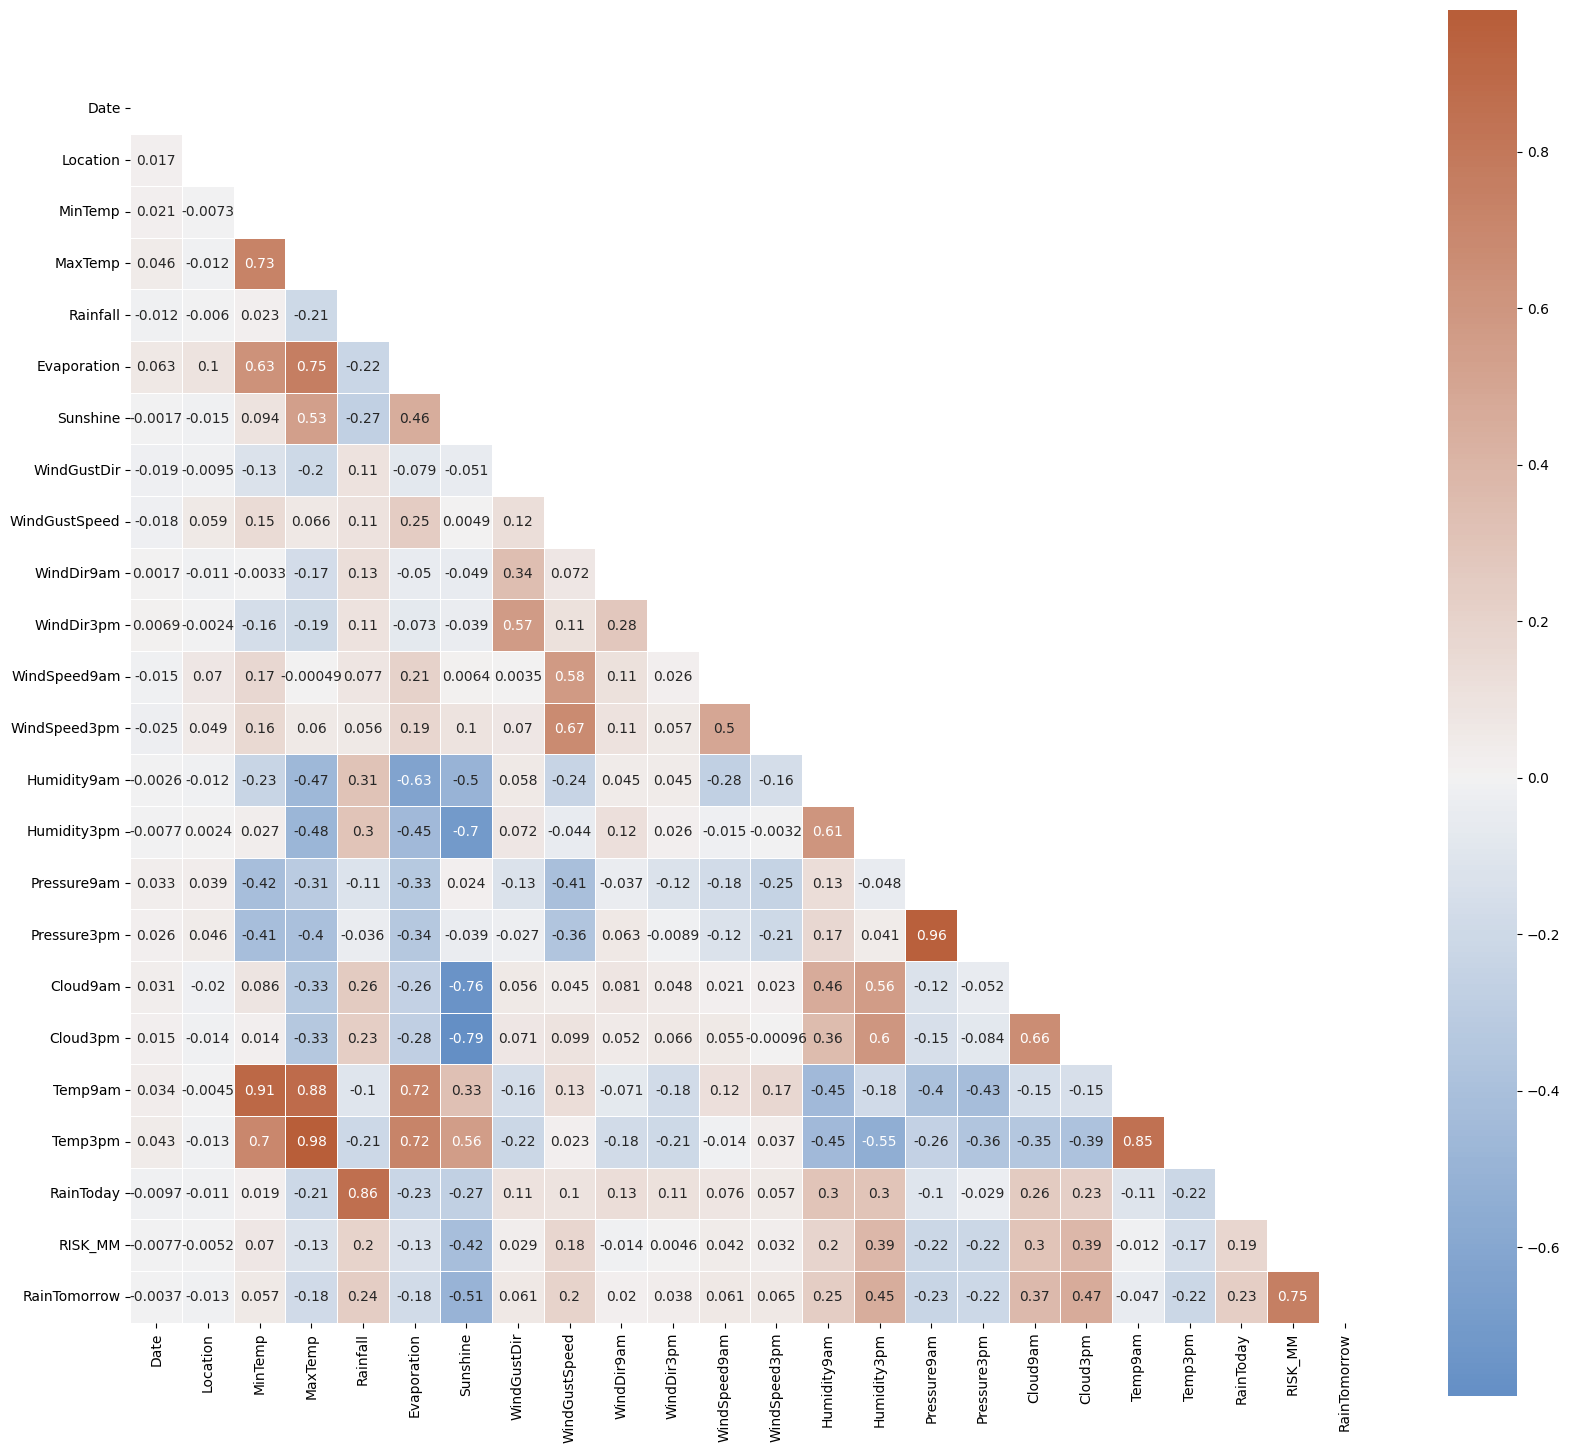

In [34]:
# Generating correlation heatmap to assess inter-connection between features
# Based on the outcome, we will attempt dropping 1 of the features with strong correlation
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sn.diverging_palette(250,25,as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidth=0.5, cbar_kws={'shrink':0.9})

In [36]:
# The features MaxTemp and MinTemp, Pressure9h and pressure3h, Temp9am and Temp3pm,
# Evaporation and MaxTemp, MaxTemp and Temp3pm show strong correlation
# But none of them have corr = 1 or close to 1,
# Hence, we will retain all of them anf proceed for model building

In [37]:
# Feature selection for model training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaler.fit(MiceImputed)
modified_data = pd.DataFrame(scaler.transform(MiceImputed),index=MiceImputed.index, columns=MiceImputed.columns)

In [39]:
# Feature importance using Filter Method (Chi Square method)
from sklearn.feature_selection import SelectKBest, chi2

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]

selector = SelectKBest(chi2, k=10)
selector.fit(X,y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [40]:
# Selecting features using wrapping method (Random Forest)
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as r_clf

In [43]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']

selector = SelectFromModel(r_clf(n_estimators=100, random_state=0))
selector.fit(X,y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()

print(features)
print(r_clf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


In [44]:
# Dividing the data into train and test parts

features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
# Function for plotting roc curve for each of the classification model that we are going to build

def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [52]:
# Function to calculate model, accuracy, roc_auc, coh_kap, time_taken

import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    #ConfusionMatrixDisplay(model, X_test, y_test, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.78963609007217
ROC Area under Curve = 0.76976981489154
Cohen's Kappa = 0.5494516226632338
Time taken = 3.792267322540283
              precision    recall  f1-score   support

           0    0.80822   0.85949   0.83307     23948
           1    0.75520   0.68005   0.71566     15265

    accuracy                        0.78964     39213
   macro avg    0.78171   0.76977   0.77436     39213
weighted avg    0.78758   0.78964   0.78736     39213



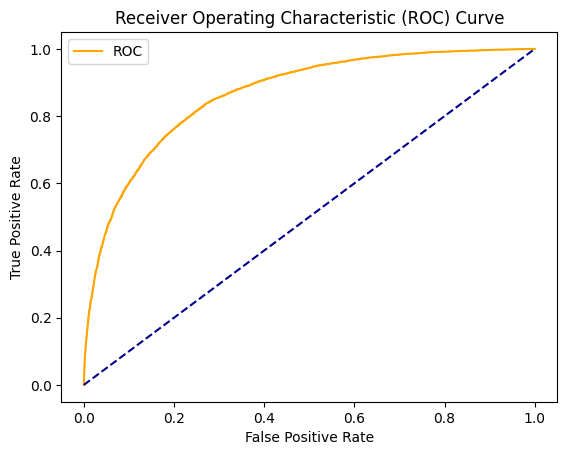

Accuracy = 0.8518858541810114
ROC Area under Curve = 0.8464936598901287
Cohen's Kappa = 0.6898902885938487
Time taken = 1.5352954864501953
              precision    recall  f1-score   support

           0    0.88481   0.87085   0.87777     23948
           1    0.80228   0.82214   0.81209     15265

    accuracy                        0.85189     39213
   macro avg    0.84354   0.84649   0.84493     39213
weighted avg    0.85268   0.85189   0.85220     39213



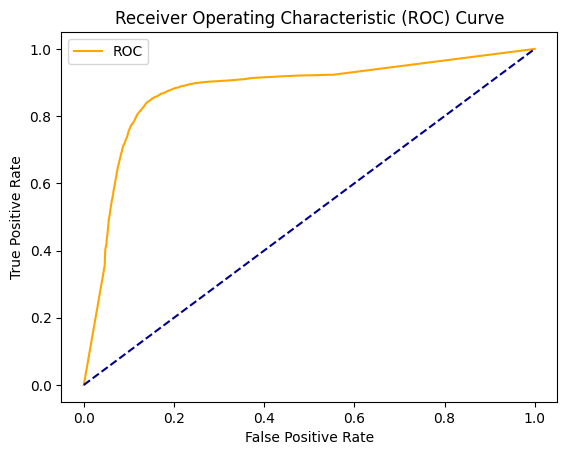

Accuracy = 0.885267640833397
ROC Area under Curve = 0.8788591735855681
Cohen's Kappa = 0.7584659792802265
Time taken = 764.1495699882507
              precision    recall  f1-score   support

           0    0.90466   0.90780   0.90623     23948
           1    0.85456   0.84992   0.85224     15265

    accuracy                        0.88527     39213
   macro avg    0.87961   0.87886   0.87923     39213
weighted avg    0.88516   0.88527   0.88521     39213



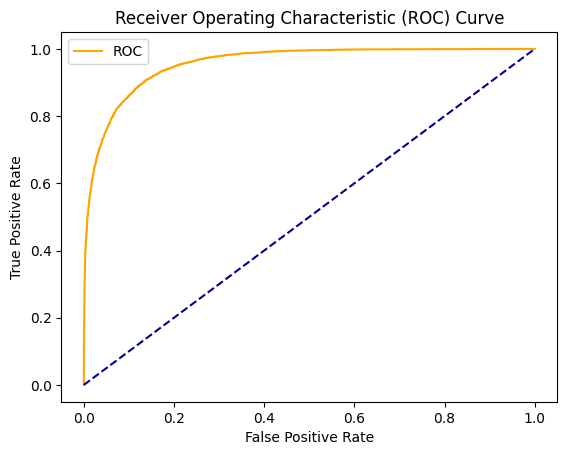

Accuracy = 0.9280595720806876
ROC Area under Curve = 0.9265770863620824
Cohen's Kappa = 0.8493714659078331
Time taken = 85.70577073097229
              precision    recall  f1-score   support

           0    0.94812   0.93327   0.94064     23948
           1    0.89783   0.91988   0.90872     15265

    accuracy                        0.92806     39213
   macro avg    0.92297   0.92658   0.92468     39213
weighted avg    0.92854   0.92806   0.92821     39213



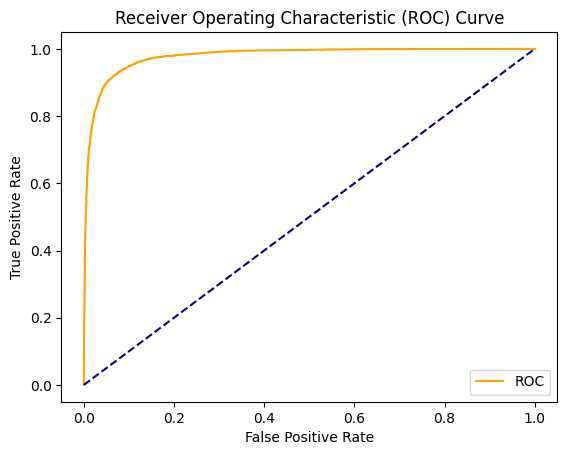

[LightGBM] [Info] Number of positive: 45912, number of negative: 71727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 117639, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390279 -> initscore=-0.446141
[LightGBM] [Info] Start training from score -0.446141
Accuracy = 0.8684619896462907
ROC Area under Curve = 0.860694163700355
Cohen's Kappa = 0.7228133047900757
Time taken = 7.812721252441406
              precision    recall  f1-score   support

           0    0.88961   0.89577   0.89268     23948
           1    0.83469   0.82561   0.83013     15265

    accuracy                        0.86846     39213
   macro avg    0.86215   0.86069   0.86140     39213
weighted avg    0.86823   0.86846   0.86833     39213



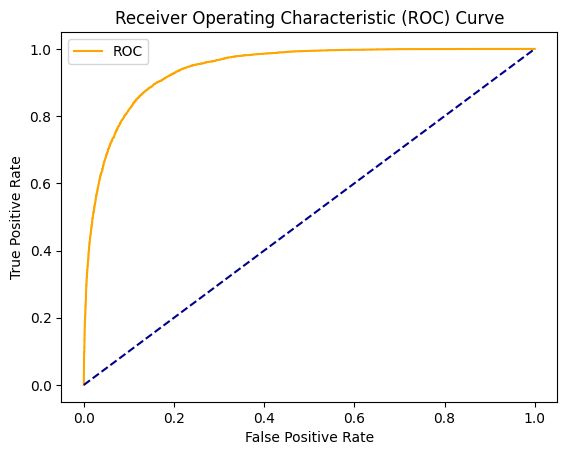

Accuracy = 0.9598347486802846
ROC Area under Curve = 0.961154451032155
Cohen's Kappa = 0.9160966204270719
Time taken = 29.185385704040527
              precision    recall  f1-score   support

           0    0.97853   0.95519   0.96672     23948
           1    0.93224   0.96711   0.94936     15265

    accuracy                        0.95983     39213
   macro avg    0.95538   0.96115   0.95804     39213
weighted avg    0.96051   0.95983   0.95996     39213



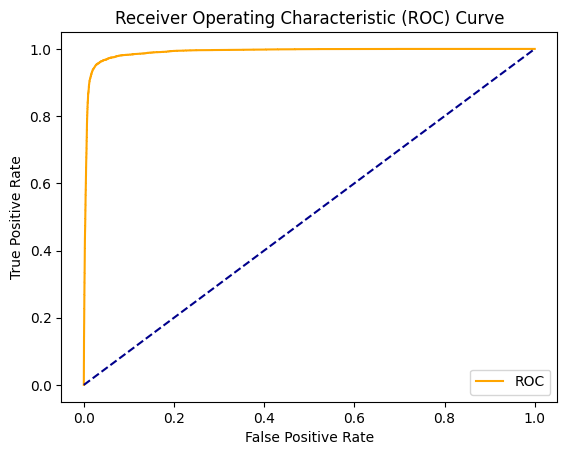

In [55]:
# Building each classifier and evaluating important performance matrices for each

# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

# Catboost
# !pip install catboost
# import catboost as cb
# params_cb ={'iterations': 50,
#             'max_depth': 16}

# model_cb = cb.CatBoostClassifier(**params_cb)
# model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

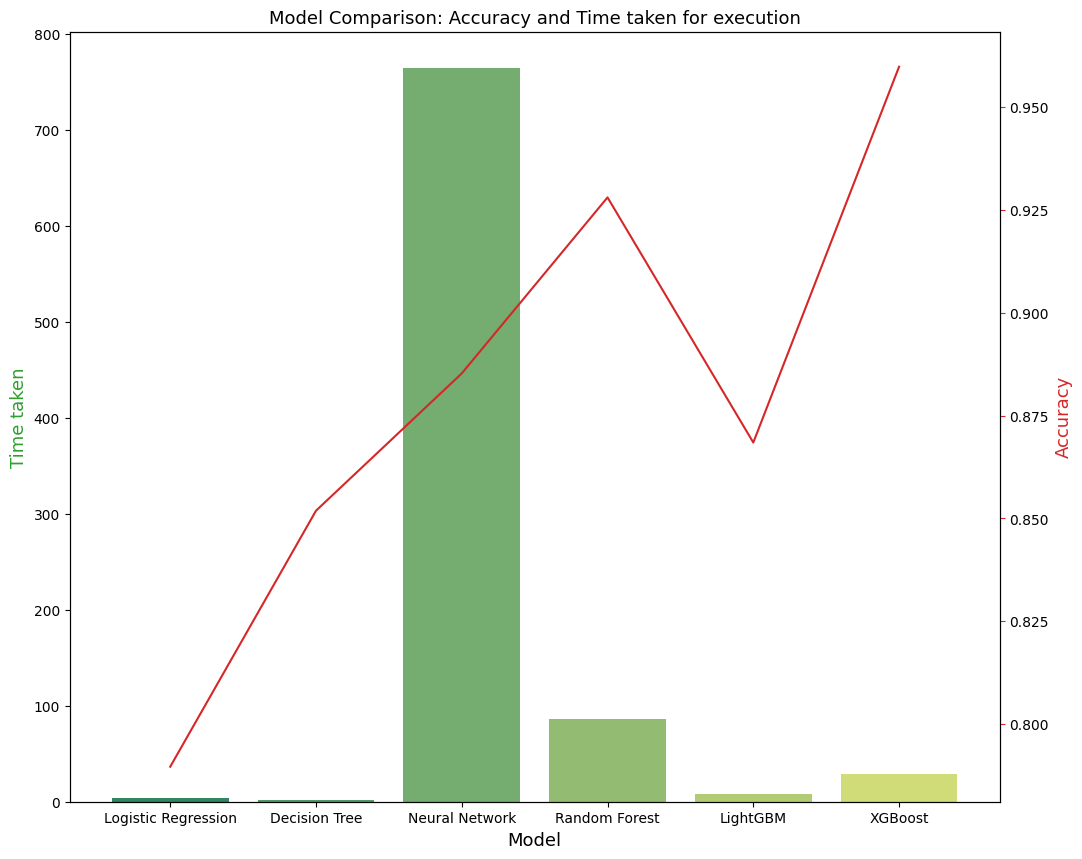

In [64]:
# Collating each model results and comparing the time taken and accurac for each model

accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sn.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sn.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


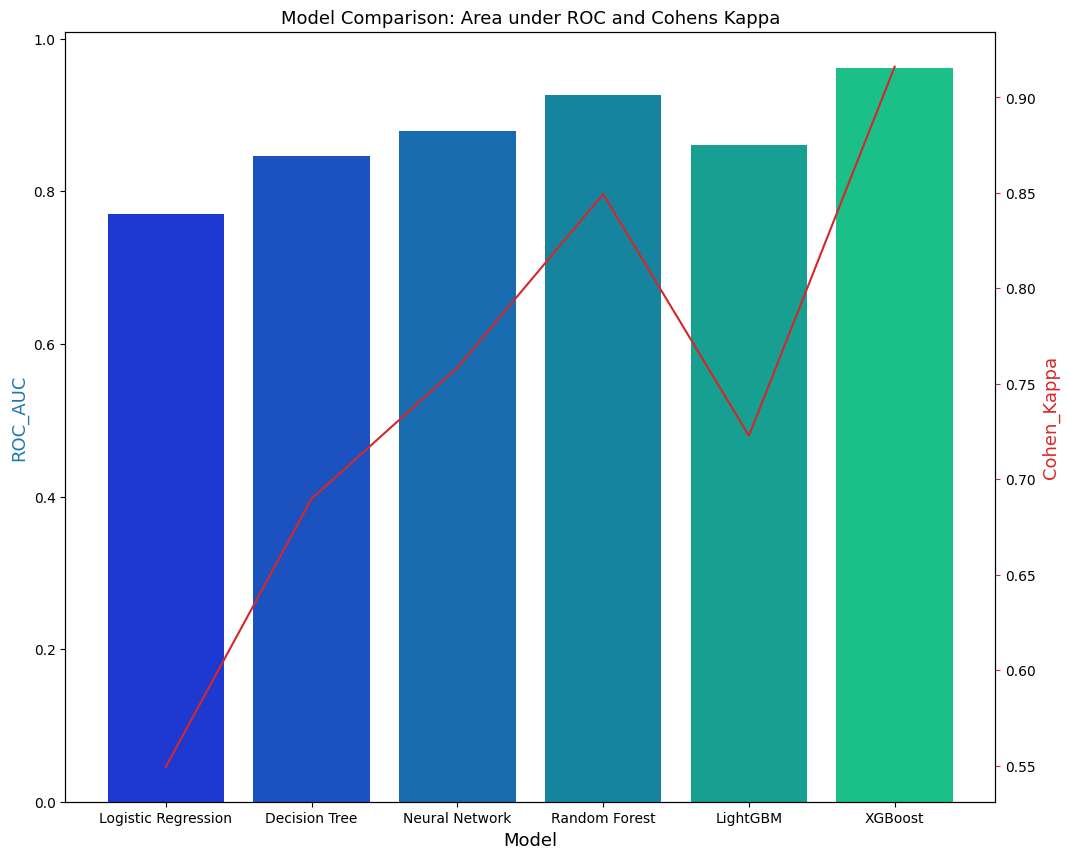

In [65]:
# Plotting and Comparing model performance using roc_auc and Cohen_Kappa metrices

fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sn.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sn.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

Based on above analysis, we can conclude following:
1. Random Forest and XGBoost performed almost equally
2. Time taken for execution between XGBoost and RandomForest is least for XGBoost
3. Hence, we can say for the problem under consideration, we can move ahead with XGBoost for production.